# **Stage 2 - Hexa Avengers (E-Commerce Shipping Data)**

# **Info Dataset**

Dataset yang digunakan merupakan dataset [E-Commerce Shipping Data](https://www.kaggle.com/datasets/prachi13/customer-analytics) yang diambil dari kaggle yang terdiri dari 10999 baris dan 12 kolom. Kolom pada dataset ini terdiri dari:
- **ID**: ID Number of Customers.
- **Warehouse block**: The Company have big Warehouse which is divided in to block such as A,B,C,D,E.
- **Mode of shipment**:The Company Ships the products in multiple way such as Ship, Flight and Road.
- **Customer care calls**: The number of calls made from enquiry for enquiry of the shipment.
- **Customer rating**: The company has rated from every customer. 1 is the lowest (Worst), 5 is the highest (Best).
- **Cost of the product**: Cost of the Product in US Dollars.
- **Prior purchases**: The Number of Prior Purchase.
- **Product importance**: The company has categorized the product in the various parameter such as low, medium, high.
- **Gender**: Male and Female.
- **Discount offered**: Discount offered on that specific product.
- **Weight in gms**: It is the weight in grams.
- **Reached on time**: It is the target variable, where 1 Indicates that the product has NOT reached on time and 0 indicates it has reached on time.

# **Info Bisnis**

## a. Problem

<div style="text-align: justify">
<p>
PT. Avengers adalah sebuah perusahaan yang bergerak dalam bidang e-commerce. Didirikan tahun 2022 dan kini memiliki 10.999 transaksi yang tercatat dalam database. Pimpinan hendak mengevaluasi terkait kinerja divisi shipping terkait temuan bahwa  sebanyak 6.563 (59.7%) dari total transaksi mengalami keterlambatan pengiriman yang diduga mempengaruhi penilaian customer terhadap kinerja perusahaan.
</p>
<p>
Tim bisnis menugaskan tim data untuk melakukan analisis terhadap data yang disediakan perusahaan untuk mengidentifikasi penyebab keterlambatan pengiriman sehingga dapat memberi rekomendasi terkait penyelesaian problem not on time rate yang tinggi.
</p>
</div>


## b. Peran

Sebagai Tim Data yang terdiri dari\
Project Leader: Kevin Usmayadhy Wijaya\
Data Analyst: Vicky Clarissa Jennie Damara\
Data Scientist : Nabil Abduh Aqil\
Machine Learning Engineer: Febiya Jomy Pratiwi\
Business Analyst: Qistina Muharrifa & Riel Jeremy Jordan Umboh

## c. Goal

Goal yang ingin dicapai adalah Menurunkan persentase keterlambatan barang


## d. Objective

- Membuat model klasifikasi yang bisa memprediksi keterlambatan barang sehingga perusahaan dapat memberikan notifikasi keterlambatan kepada customer
- Mengetahui faktor-faktor yang mempengaruhi keterlambatan


## e. Business Metrics


Not on-time Rate (Persentase produk yang tidak tepat waktu)


# **Import Library**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from matplotlib.ticker import PercentFormatter
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder, KBinsDiscretizer
from sklearn.feature_selection import SelectKBest, mutual_info_classif

In [ ]:
sns.set_style("whitegrid")

# **Load Dataset**

In [ ]:
sheet_id = '1P5-8XwOXjr_zSiJ-U5W1VhqHIHKqUjUe2CwW_Rd9iCQ'
url = f'https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv'
df = pd.read_csv(url)
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


In [ ]:
df.rename(columns={'Reached.on.Time_Y.N':'Is_Late'}, inplace=True)

In [ ]:
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Is_Late
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


# **Pre-processing Dataset**

## - Eksplorasi berbagai attributes dan mengecek apakah ada data bermasalah

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Is_Late              10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [ ]:
numericals=['Customer_care_calls','Customer_rating','Cost_of_the_Product','Prior_purchases','Discount_offered','Weight_in_gms','Is_Late']
categoricals=['Warehouse_block','Mode_of_Shipment','Product_importance','Gender']


In [ ]:
df[numericals].describe()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Is_Late
count,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [ ]:
#Persebaran data numericals adalah wajar.

In [ ]:
df[categoricals].describe()

,Warehouse_block,Mode_of_Shipment,Product_importance,Gender
count,10999,10999,10999,10999
unique,5,3,3,2
top,F,Ship,low,F
freq,3666,7462,5297,5545


In [ ]:
print (df['Warehouse_block']. unique())
print (df['Mode_of_Shipment']. unique())
print (df['Product_importance']. unique())
print (df['Gender']. unique())
print (df['Customer_rating']. unique())
print (df['Customer_care_calls']. unique())


['D' 'F' 'A' 'B' 'C']
['Flight' 'Ship' 'Road']
['low' 'medium' 'high']
['F' 'M']
[2 5 3 1 4]
[4 2 3 5 6 7]


Berdasarkan describe dan pemeriksaan nilai unique pada data categoricals tidak terdapat data bermasalah pada data set.

## - Handling missing value

In [ ]:
df.isna().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Is_Late                0
dtype: int64

Tiap kolom tidak menunjukkan adanya missing value

## - Handling duplicated data

In [ ]:
df.duplicated().sum()

0

Tiap kolom tidak menunjukkan adanya duplicated data

## - Handling outlier data

In [ ]:
df.columns

Index(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Is_Late'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Is_Late              10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [ ]:
numeric = ['Prior_purchases','Discount_offered','Cost_of_the_Product','Weight_in_gms','Customer_care_calls','Customer_rating']

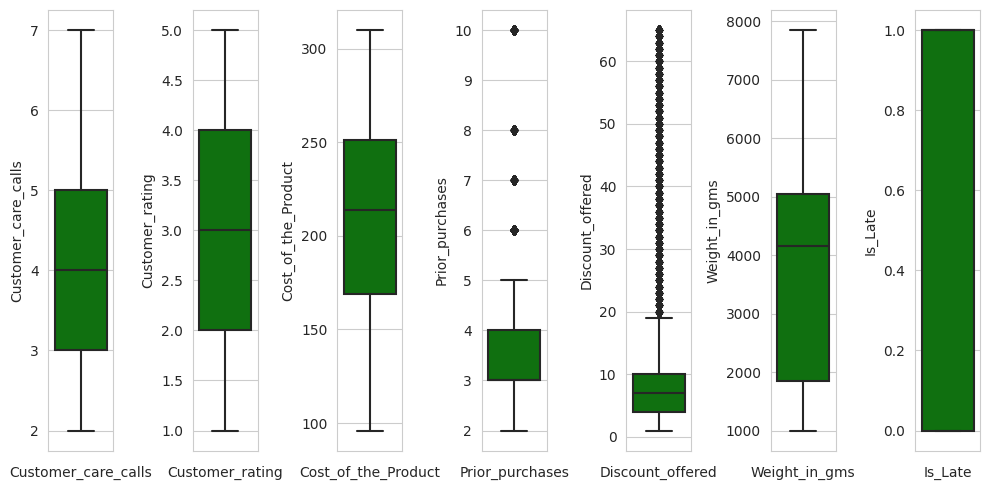

In [ ]:
#train features
plt.figure(figsize=(10,5))
for i in range(len(numericals)):
  ax1 = plt.subplot(1,len(numericals), i+1)
  ax1 = sns.boxplot(y = numericals[i], data = df, color = 'green')
  ax1 = plt.xlabel(numericals[i])
  plt.tight_layout(h_pad=3.0)

Terdapat outlier pada **Discout_offered** dan **Prior_purchases** yang perlu dihandling. <br>
Dikarenakan dataset berjumlah hanya 10000, maka dilanjutkan dengan **Log transform** untuk handling outlier yang tidak merubah jumlah data. Jika menggunakan metode handling outlier *IQR* atau *zscore* dapat menghapus banyak data dan diperkirakan memengaruhi performa model nantinya

## - Feature Transformation (Numeric)

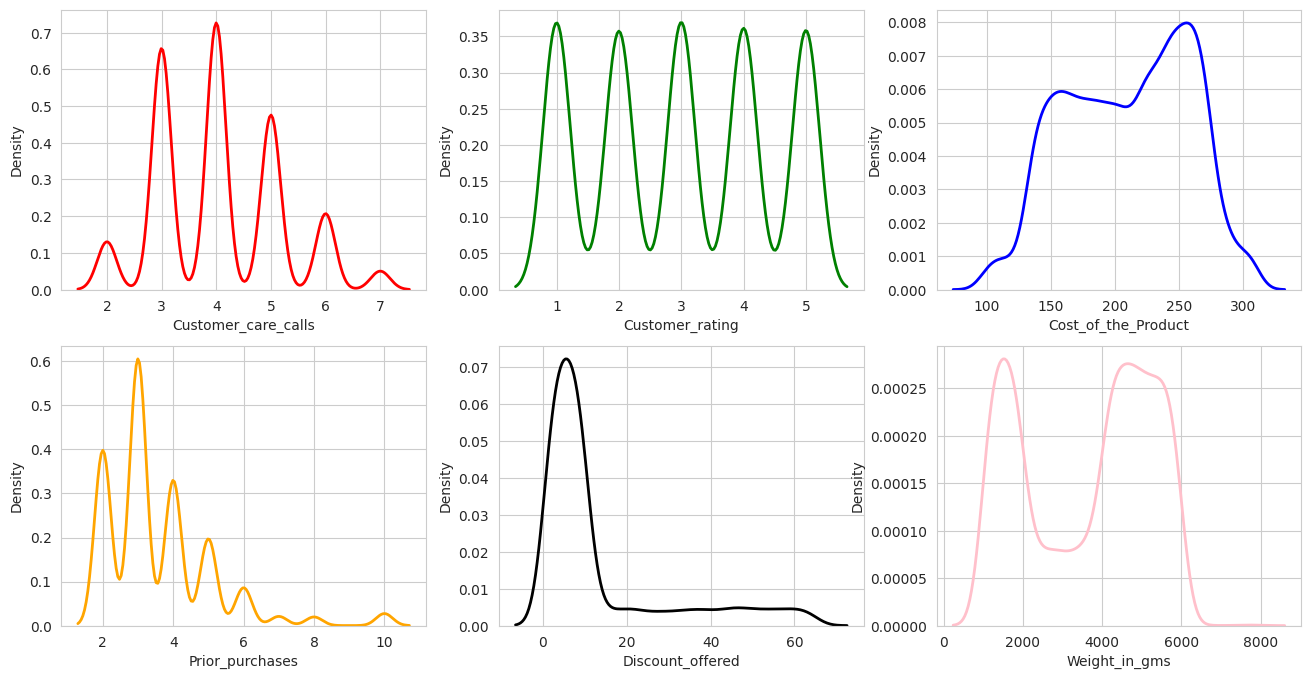

In [ ]:
colorArr = ['red', 'green', 'blue', 'orange','black','pink']
features = numericals[:6]
plt.figure(figsize=(16, 8))
for i in range(0, len(features)):
  plt.subplot(math.ceil(len(features)/3), 3, i+1)
  sns.kdeplot(data=df, x=features[i], linewidth=2, color=colorArr[i])

In [ ]:
#log transformation
df['Discount_offered'] = np.log(df['Discount_offered'])
df['Prior_purchases'] = np.log(df['Prior_purchases'])
# menampilkan hasil log transformation
print(len(df['Discount_offered']))
print(df['Prior_purchases'])

10999
0        1.098612
1        0.693147
2        1.386294
3        1.386294
4        1.098612
           ...   
10994    1.609438
10995    1.609438
10996    1.609438
10997    1.791759
10998    1.609438
Name: Prior_purchases, Length: 10999, dtype: float64


<Axes: xlabel='Discount_offered', ylabel='Density'>

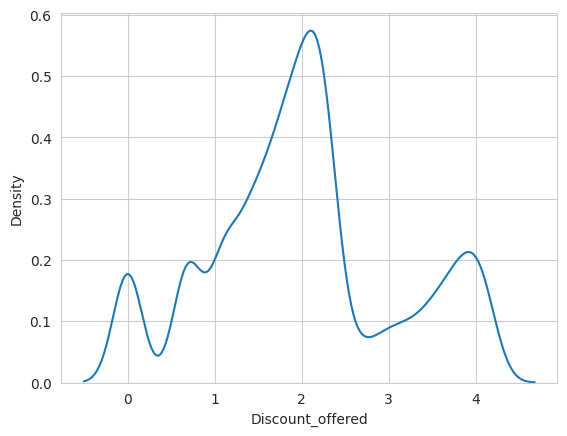

In [ ]:
sns.kdeplot(df['Discount_offered'])

<Axes: xlabel='Prior_purchases', ylabel='Density'>

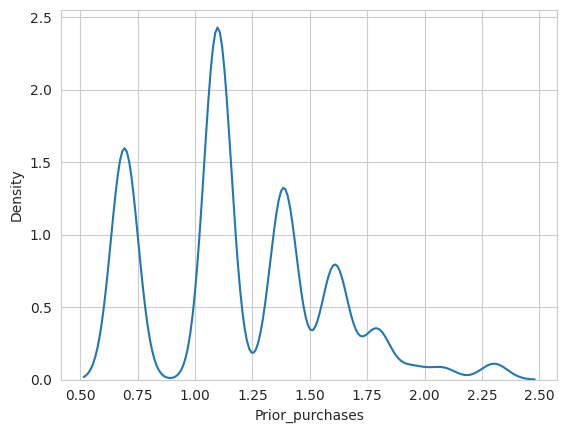

In [ ]:
sns.kdeplot(df['Prior_purchases'])

## - Splitting data

In [ ]:
X = df.drop(['Is_Late','ID'], axis=1)
y = df['Is_Late']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size= 0.2, random_state= 4)

In [ ]:
print('Jumlah (baris,kolom) data train :', x_train.shape)
print('Jumlah (baris,kolom) data test:', x_test.shape)

Jumlah (baris,kolom) data train : (8799, 10)
Jumlah (baris,kolom) data test: (2200, 10)


# Feature Scalling

In [ ]:
#MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x_train[['Cost_of_the_Product']])
x_train['Cost_of_the_Product'] = scaler.transform(x_train[['Cost_of_the_Product']])
x_test['Cost_of_the_Product'] = scaler.transform(x_test[['Cost_of_the_Product']])

In [ ]:
#StandarScaler
scaler = StandardScaler()
scaler.fit(x_train[['Weight_in_gms']])
x_train['Weight_in_gms'] = scaler.transform(x_train[['Weight_in_gms']])
x_test['Weight_in_gms'] = scaler.transform(x_test[['Weight_in_gms']])

## - Feature Encoding (Categoric)

In [ ]:
#Label Encoding
mapping_Gender={
    'M' : 0,
    'F' : 1
}
x_train['Gender'] = x_train['Gender'].map(mapping_Gender)
x_test['Gender'] = x_test['Gender'].map(mapping_Gender)
mapping_Product_importance ={
    'low' : 0,
    'medium' : 1,
    'high' : 2
}
x_train['Product_importance'] = x_train['Product_importance'].map(mapping_Product_importance)
x_test['Product_importance'] = x_test['Product_importance'].map(mapping_Product_importance)


In [ ]:
x_train.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
254,A,Road,2,2,0.261682,1.098612,0,1,4.110874,-1.122937
6850,C,Flight,3,3,0.392523,1.945910,1,1,1.386294,0.875957
930,D,Ship,4,3,0.308411,0.693147,0,0,0.693147,-1.175540
8333,F,Road,4,1,0.775701,1.791759,0,0,0.000000,-1.228754
9184,C,Flight,4,3,0.574766,1.609438,0,1,2.079442,-1.182880


In [ ]:
#one hot encoding Warehouse_block
OHE_Warehouse_block = OneHotEncoder(sparse=False)
OHE_Warehouse_block.fit(x_train[['Warehouse_block']])
df_OHE_Warehouse_block = pd.DataFrame(OHE_Warehouse_block.transform(x_train[['Warehouse_block']]))
df_OHE_Warehouse_block.columns = ['Warehouse_block_A', 'Warehouse_block_B', 'Warehouse_block_C', 'Warehouse_block_D', 'Warehouse_block_F']
x_train = x_train.reset_index()
x_train.drop(['index', 'Warehouse_block'], axis=1, inplace=True)
x_train = x_train.join(df_OHE_Warehouse_block)
x_train


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F
0,Road,2,2,0.261682,1.098612,0,1,4.110874,-1.122937,1.0,0.0,0.0,0.0,0.0
1,Flight,3,3,0.392523,1.945910,1,1,1.386294,0.875957,0.0,0.0,1.0,0.0,0.0
2,Ship,4,3,0.308411,0.693147,0,0,0.693147,-1.175540,0.0,0.0,0.0,1.0,0.0
3,Road,4,1,0.775701,1.791759,0,0,0.000000,-1.228754,0.0,0.0,0.0,0.0,1.0
4,Flight,4,3,0.574766,1.609438,0,1,2.079442,-1.182880,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8794,Road,6,3,0.808411,1.386294,0,0,1.098612,-1.608593,0.0,0.0,0.0,0.0,1.0
8795,Ship,7,1,0.448598,1.098612,0,0,3.637586,-1.384727,0.0,0.0,0.0,0.0,1.0
8796,Road,4,4,0.509346,0.693147,1,1,2.079442,1.370176,0.0,0.0,0.0,0.0,1.0
8797,Flight,5,4,0.186916,1.386294,0,0,2.197225,1.121232,1.0,0.0,0.0,0.0,0.0


In [ ]:
df_OHE_Warehouse_block = pd.DataFrame(OHE_Warehouse_block.transform(x_test[['Warehouse_block']]))
df_OHE_Warehouse_block.columns = ['Warehouse_block_A', 'Warehouse_block_B', 'Warehouse_block_C', 'Warehouse_block_D', 'Warehouse_block_F']
x_test = x_test.reset_index()
x_test.drop(['index', 'Warehouse_block'], axis=1, inplace=True)
x_test = x_test.join(df_OHE_Warehouse_block)
x_test

,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F
0,Ship,3,3,0.644860,1.098612,0,1,2.079442,0.735888,1.0,0.0,0.0,0.0,0.0
1,Ship,5,5,0.775701,1.609438,0,0,0.693147,-1.426319,0.0,0.0,1.0,0.0,0.0
2,Ship,5,3,0.542056,0.693147,0,1,1.945910,0.968318,0.0,1.0,0.0,0.0,0.0
3,Ship,4,1,0.439252,2.302585,0,1,3.555348,0.111998,1.0,0.0,0.0,0.0,0.0
4,Ship,3,1,0.803738,1.386294,1,1,1.386294,0.838035,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,Flight,6,2,0.621495,1.098612,1,0,2.564949,-0.803653,0.0,1.0,0.0,0.0,0.0
2196,Flight,3,2,0.780374,1.098612,0,1,4.043051,-0.931489,0.0,0.0,0.0,0.0,1.0
2197,Ship,3,4,0.500000,0.693147,0,0,2.197225,1.283932,0.0,0.0,0.0,1.0,0.0
2198,Ship,2,2,0.285047,1.098612,1,1,2.197225,0.557284,0.0,1.0,0.0,0.0,0.0


In [ ]:
#one hot encoding 'Mode_of_Shipment'
OHE_Mode_of_Shipment = OneHotEncoder(sparse=False)
OHE_Mode_of_Shipment.fit(x_train[['Mode_of_Shipment']])
df_OHE_Mode_of_Shipment = pd.DataFrame(OHE_Mode_of_Shipment.transform(x_train[['Mode_of_Shipment']]))
df_OHE_Mode_of_Shipment.columns = ['Mode_of_Shipment_Flight', 'Mode_of_Shipment_Road', 'Mode_of_Shipment_Ship']
x_train = x_train.reset_index()
x_train.drop(['index', 'Mode_of_Shipment'], axis=1, inplace=True)
x_train = x_train.join(df_OHE_Mode_of_Shipment)
x_train


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship
0,2,2,0.261682,1.098612,0,1,4.110874,-1.122937,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,3,3,0.392523,1.945910,1,1,1.386294,0.875957,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,4,3,0.308411,0.693147,0,0,0.693147,-1.175540,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,4,1,0.775701,1.791759,0,0,0.000000,-1.228754,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,4,3,0.574766,1.609438,0,1,2.079442,-1.182880,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8794,6,3,0.808411,1.386294,0,0,1.098612,-1.608593,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
8795,7,1,0.448598,1.098612,0,0,3.637586,-1.384727,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
8796,4,4,0.509346,0.693147,1,1,2.079442,1.370176,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
8797,5,4,0.186916,1.386294,0,0,2.197225,1.121232,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
df_OHE_Mode_of_Shipment = pd.DataFrame(OHE_Mode_of_Shipment.transform(x_test[['Mode_of_Shipment']]))
df_OHE_Mode_of_Shipment.columns = ['Mode_of_Shipment_Flight', 'Mode_of_Shipment_Road', 'Mode_of_Shipment_Ship']
x_test = x_test.reset_index()
x_test.drop(['index', 'Mode_of_Shipment'], axis=1, inplace=True)
x_test = x_test.join(df_OHE_Mode_of_Shipment)
x_test

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship
0,3,3,0.644860,1.098612,0,1,2.079442,0.735888,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,5,5,0.775701,1.609438,0,0,0.693147,-1.426319,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,5,3,0.542056,0.693147,0,1,1.945910,0.968318,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4,1,0.439252,2.302585,0,1,3.555348,0.111998,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,3,1,0.803738,1.386294,1,1,1.386294,0.838035,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,6,2,0.621495,1.098612,1,0,2.564949,-0.803653,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2196,3,2,0.780374,1.098612,0,1,4.043051,-0.931489,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2197,3,4,0.500000,0.693147,0,0,2.197225,1.283932,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2198,2,2,0.285047,1.098612,1,1,2.197225,0.557284,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


## - Feature Extraction

Untuk mengatasi cardinalitas yang tinggi di fitur 'weight in gms' kita akan melakukan feature engineering dengan cara kita membaginya menjadi 5 bin dengan uniform binning.Fitur ini akan kita namakan "weight_uniform_discrete".

In [ ]:
discretizer = KBinsDiscretizer(n_bins = 5, encode = 'ordinal', strategy = 'uniform')
x_train['weight_uniform_discrete'] = discretizer.fit_transform(x_train['Weight_in_gms'].values.reshape(-1,1)).astype(int)
x_train.head()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,weight_uniform_discrete
0,2,2,0.261682,1.098612,0,1,4.110874,-1.122937,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
1,3,3,0.392523,1.945910,1,1,1.386294,0.875957,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2
2,4,3,0.308411,0.693147,0,0,0.693147,-1.175540,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0
3,4,1,0.775701,1.791759,0,0,0.000000,-1.228754,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0
4,4,3,0.574766,1.609438,0,1,2.079442,-1.182880,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0


In [ ]:
x_test['weight_uniform_discrete'] = discretizer.transform(x_test['Weight_in_gms'].values.reshape(-1,1)).astype(int)
x_test.head()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,weight_uniform_discrete
0,3,3,0.644860,1.098612,0,1,2.079442,0.735888,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2
1,5,5,0.775701,1.609438,0,0,0.693147,-1.426319,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0
2,5,3,0.542056,0.693147,0,1,1.945910,0.968318,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3
3,4,1,0.439252,2.302585,0,1,3.555348,0.111998,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2
4,3,1,0.803738,1.386294,1,1,1.386294,0.838035,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2


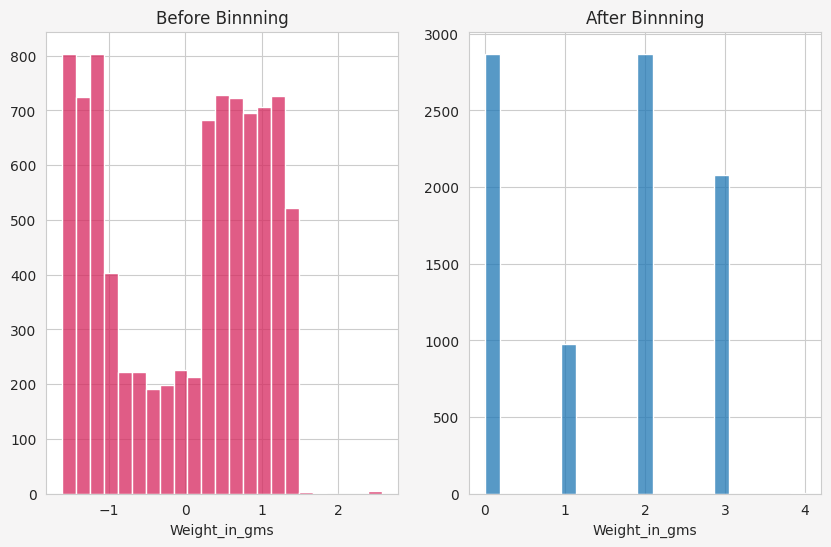

In [ ]:
# plot uniform binning X train

plt.figure(figsize=(10,6), facecolor='#f6f5f5')
plt.subplot(1,2,1)
sns.histplot(data = x_train['Weight_in_gms'], color="#D6265D", legend=False)
plt.xlabel('Weight_in_gms')
plt.ylabel('')
plt.title('Before Binnning')

plt.subplot(1,2,2)
sns.histplot(data = x_train['weight_uniform_discrete'], legend=False)
plt.xlabel('Weight_in_gms')
plt.ylabel('')
plt.title('After Binnning')

plt.show()

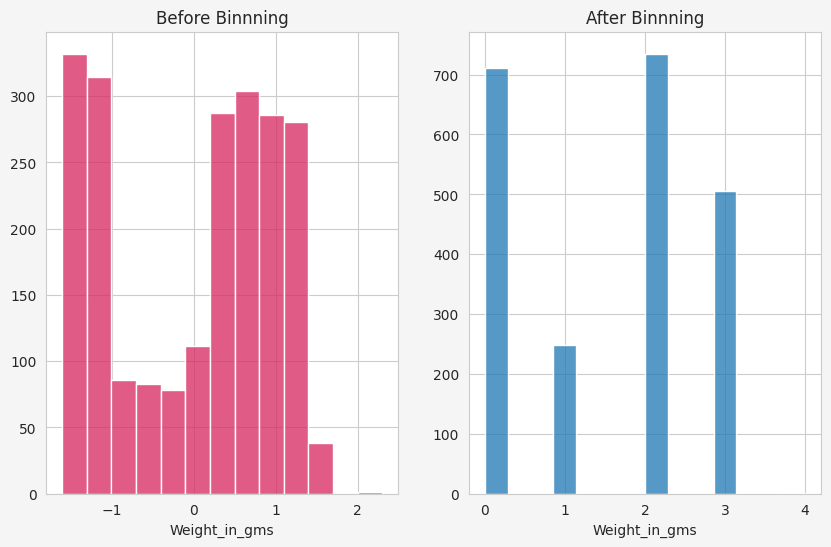

In [ ]:
# plot uniform binning X test

plt.figure(figsize=(10,6), facecolor='#f6f5f5')
plt.subplot(1,2,1)
sns.histplot(data = x_test['Weight_in_gms'], color="#D6265D", legend=False)
plt.xlabel('Weight_in_gms')
plt.ylabel('')
plt.title('Before Binnning')

plt.subplot(1,2,2)
sns.histplot(data = x_test['weight_uniform_discrete'], legend=False)
plt.xlabel('Weight_in_gms')
plt.ylabel('')
plt.title('After Binnning')

plt.show()

## - Feature selection

In [ ]:
target = y_train.reset_index()
target.drop(['index'], axis=1, inplace=True)
correlation_df = x_train.join(target)
correlation_df

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,weight_uniform_discrete,Is_Late
0,2,2,0.261682,1.098612,0,1,4.110874,-1.122937,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,1
1,3,3,0.392523,1.945910,1,1,1.386294,0.875957,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2,1
2,4,3,0.308411,0.693147,0,0,0.693147,-1.175540,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,1
3,4,1,0.775701,1.791759,0,0,0.000000,-1.228754,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0,1
4,4,3,0.574766,1.609438,0,1,2.079442,-1.182880,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8794,6,3,0.808411,1.386294,0,0,1.098612,-1.608593,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0,0
8795,7,1,0.448598,1.098612,0,0,3.637586,-1.384727,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0,1
8796,4,4,0.509346,0.693147,1,1,2.079442,1.370176,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,3,0
8797,5,4,0.186916,1.386294,0,0,2.197225,1.121232,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3,0


<Axes: >

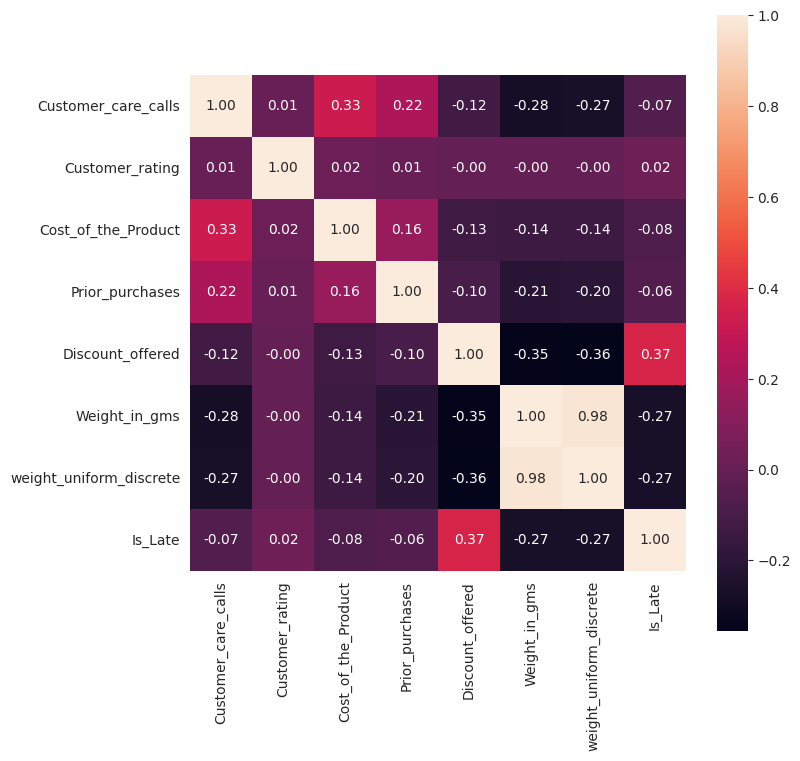

In [ ]:
plt.figure(figsize = (8,8))
sns.heatmap(correlation_df[['Customer_care_calls',  'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',  'Discount_offered', 'Weight_in_gms', 'weight_uniform_discrete', 'Is_Late']].corr(), annot = True, square = True, fmt = '.2f')

In [ ]:
# drop weight_in_gms

x_train = x_train.drop('Weight_in_gms', axis = 1)
x_train

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,weight_uniform_discrete
0,2,2,0.261682,1.098612,0,1,4.110874,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
1,3,3,0.392523,1.945910,1,1,1.386294,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2
2,4,3,0.308411,0.693147,0,0,0.693147,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0
3,4,1,0.775701,1.791759,0,0,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0
4,4,3,0.574766,1.609438,0,1,2.079442,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8794,6,3,0.808411,1.386294,0,0,1.098612,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0
8795,7,1,0.448598,1.098612,0,0,3.637586,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0
8796,4,4,0.509346,0.693147,1,1,2.079442,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,3
8797,5,4,0.186916,1.386294,0,0,2.197225,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3


Berdasarkan heatmap tidak ada data yang berkolerasi tinggi. Maka kita akan gunakan seluruh fitur yang ada untuk dicek dengan mutual info classification.

## **Mutual Info Classification**

In [ ]:
mutual_info = mutual_info_classif(x_train, y_train)
mutual_info

array([0.00071685, 0.        , 0.01663461, 0.00103661, 0.00192766,
       0.00368274, 0.15205656, 0.        , 0.00428271, 0.        ,
       0.00462536, 0.        , 0.00530667, 0.        , 0.00223876,
       0.09117356])

In [ ]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = x_train.columns
mutual_info.sort_values(ascending=False)

Discount_offered           0.152057
weight_uniform_discrete    0.091174
Cost_of_the_Product        0.016635
Mode_of_Shipment_Flight    0.005307
Warehouse_block_D          0.004625
Warehouse_block_B          0.004283
Gender                     0.003683
Mode_of_Shipment_Ship      0.002239
Product_importance         0.001928
Prior_purchases            0.001037
Customer_care_calls        0.000717
Customer_rating            0.000000
Warehouse_block_A          0.000000
Warehouse_block_C          0.000000
Warehouse_block_F          0.000000
Mode_of_Shipment_Road      0.000000
dtype: float64

<Axes: >

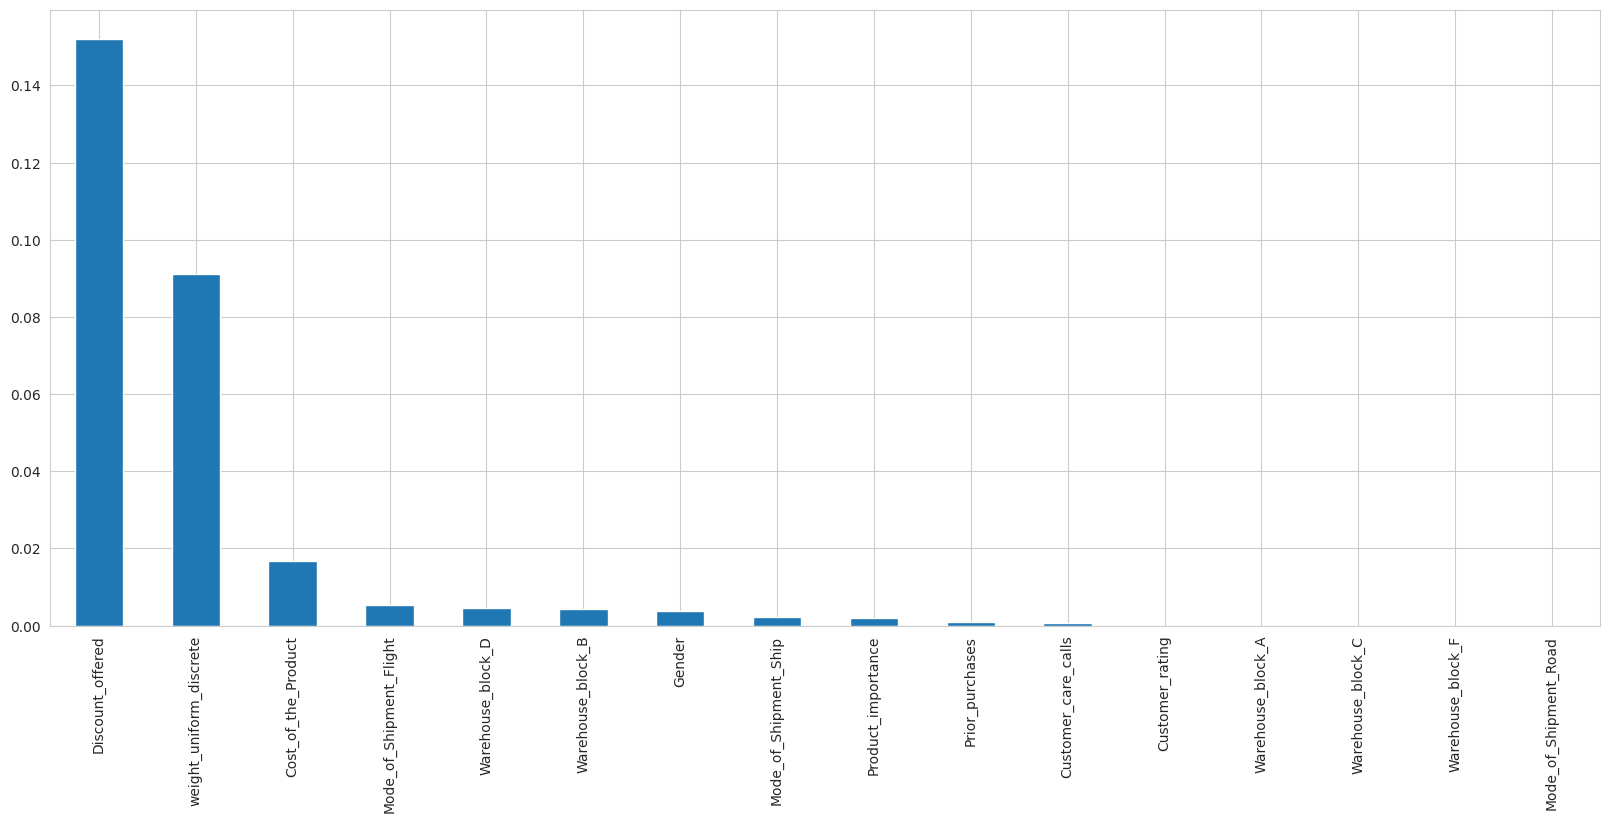

In [ ]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

Berdasarkan Mutual Info Classification, Discount_offered memiliki informasi tertinggi terhadap target kemudian berturut-turut, weight_uniform_discreate, prior purchase, cost of the product, Mode of shipment flight, mode of shipment ship, warehouse block b, customer rating, dan customer care calls.

In [ ]:
sel_five_cols = SelectKBest(mutual_info_classif, k=7)
sel_five_cols.fit(x_train, y_train)
x_train.columns[sel_five_cols.get_support()]

Index(['Customer_rating', 'Cost_of_the_Product', 'Discount_offered',
       'Warehouse_block_B', 'Mode_of_Shipment_Flight', 'Mode_of_Shipment_Road',
       'weight_uniform_discrete'],
      dtype='object')

Rekomendasi fitur yang akan dipilih adalah:
1. Discount_offered
2. Weight_uniform_discrete
3. Prior_purchases
4. Cost_of_the_product
5. Customer_care_calls (optional)

## - Handling imbalanced data

<Axes: ylabel='Is_Late'>

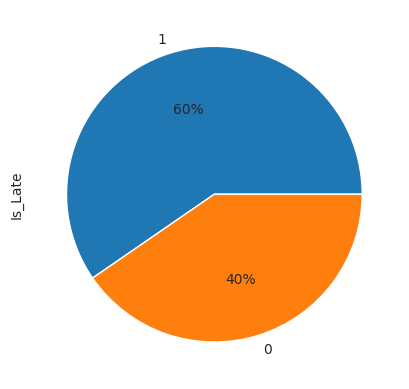

In [ ]:
y_train.value_counts().plot(kind='pie', autopct='%.0f%%')

Berdasarkan pie chart di atas, perbandingan data ialah 60:40 sehingga tidak diperlukan handle imbalanced data

## - Feature Tambahan

Berikut merupakan 5 Fitur tambahan yang mungkin akan membantu performansi model:
1. **Tanggal Produk Dikirim**: Untuk mengetahui apakah pada tanggal barang dikirim sedang ada musim, event tertentu atau sedang hari libur atau bukan.
2. **Tanggal Produk Sampai**: Sama seperti tanggal produk dikirim namun dari fitur baru ini dapat dibuat fitur baru seperti berapa lama produk dikirim dan kita dapat mengetahui rentang tanggal produk dikirim dan memerika apakah ada suatu hal di rentang tanggal tersebut.
3. **Tanggal Produk Dibeli**: Agar kita dapat mengetahui masalah pengantaran adalah memang dari pengantaran barang, atau saat packing barang.
4. **Kategori Produk**: Untuk mengetahui apakah ada kategori produk yang memiliki persentase keterlambatan yang tinggi, jika ada dapat dijadikan sebagai fitur yang bagus.
5. **Jumlah Produk**: Untuk mengetahui rata-rata jumlah produk dari orderan yang terlambat dan tidak, jika ada perbedaan yang signifikan fitur ini dapat dipertimbangkan untuk membantu performansi model.

---